# Importing toolkits💼

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px 
from plotly.offline import iplot

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"

In [2]:
# Adding Line To Plotly Figure
def add_line(x0 = 0, y0 = 0, x1 = 0, y1 = 0, 
             line_color = "#00DFA2", font_color = "#3C486B", 
             xposition = "right", text = "Text"):
    fig.add_shape(type='line',
                  x0 = x0,
                  y0 = y0,
                  x1 = x1,
                  y1 = y1 + 2,
                  line = {
                      "color" : line_color,
                      "width" : 3,
                      "dash" : "dashdot"
                  },
                  label={
                      "text" : f"\t{text}: {x1: 0.1f}\t".expandtabs(5),
                      "textposition": "end",
                      "yanchor" :"top",
                      "xanchor" :xposition,
                      "textangle" :0,
                      "font": {
                          "size": 14,
                          "color" :font_color,
                          "family" : "arial"

                      },
                  }
                 )

In [3]:
def custome_layout(title_size = 28, hover_font_size = 16, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : hover_font_size,
        "font_family" :"arial"
    }

)

# Loading data

In [4]:
df = pd.read_csv("Salary Data.csv")

# Let's Get Quick Overview🧐

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
df.sample(10, random_state=15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
64,26.0,Male,Bachelor's,Junior Accountant,1.0,35000.0
367,41.0,Male,Bachelor's,Senior Product Manager,14.0,150000.0
116,40.0,Female,Bachelor's,Office Manager,15.0,65000.0
176,42.0,Female,PhD,Senior Marketing Manager,18.0,140000.0
239,39.0,Male,Bachelor's,Senior Marketing Specialist,10.0,120000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
277,34.0,Female,Bachelor's,Junior Financial Analyst,5.0,70000.0
222,33.0,Male,Bachelor's,Senior Product Development Manager,7.0,100000.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


# Now, let's do some data preprocessing🔨

## ♠ First of all, check for nan values 

In [8]:
# Check For Duplicates
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
# Get Quick Look at Nan Values
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


<p style = "color: gold;
            font: bold 22px arial;
            padding: 15px;
            background-color: #123">
    • Okay!!..🤔 From this, I think we have to remove these two records..😉
</p>

In [10]:
# Drop Records That Contain Only Nan Values 
df.dropna(inplace=True)

# Check Again For Nan Values
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## ♠ Now, let's check for duplicates records

In [11]:
df.duplicated().sum()

49

In [12]:
df[df.duplicated()].head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


<p style = "color: gold;
            font: bold 22px arial;
            padding: 15px;
            background-color: #123">
    • From this also, I think we have to remove the duplicate rows because they will affect our prediction model😉😉
</p>

In [13]:
# Drop Duplicates Records
df.drop_duplicates(inplace=True)

# Reset Our Index to be Orderd
df.reset_index(inplace=True, drop=True)

In [14]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Now, It's Time To Dive Deeper Into Each Importnat Column 🤿

<p style = "color: #98EECC;
            font: bold 18px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid lightgreen;
            border-radius: 8px">
    ♣ Age Column 👨👨‍🦳
</p>

In [15]:
mean_of_age = df["Age"].mean()
median_of_age = df["Age"].median()

In [85]:
fig = px.box(
    y=df["Age"], 
    title= "Ages Distribution",
    template="plotly_dark",
    labels={"y" :"Age"},
)
custome_layout()

iplot(fig)

In [17]:
fig = px.histogram(
    df["Age"], 
    nbins=25,
    title= "Age Distribution",
    template="plotly_dark",
    labels={"value" :"Age"}
)

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 20,
        "family" :"tahoma",
        "color": "#fff"
    },
    hovertemplate = "Age: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#000', width=0.1))
)


# Adding Mean Line
add_line(x0=mean_of_age, y0=0, x1=mean_of_age, y1=30+2, line_color="#E97777",font_color="#E97777", 
         text="Mean", xposition="left")

# Adding Median Line
add_line(x0=median_of_age, y0=0, x1=median_of_age, y1=30+2, line_color="#FFE5F1",
         font_color="#fff", xposition="right", text="Median")

iplot(fig)

<p style = "color: gold;
            font: bold 20px arial;
            padding: 15px;
            background-color: #123">
 #  From Histogram 👌😉
    <br>
    ► We Can Say, The Age has a Moderate Right Skewness 
</p>

<p style = "color: #98EECC;
            font: bold 18px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid lightgreen;
            border-radius: 8px">
    ♣ Gender Column 👨👩
</p>

In [18]:
gender = df["Gender"].value_counts(normalize=1) * 100
gender.apply(lambda x: f"{x:0.2f}%")

Gender
Male      52.47%
Female    47.53%
Name: proportion, dtype: object

In [19]:
fig = px.bar(data_frame = gender,
             x = gender.index,
             y = gender,
             color = gender.index,
             title = "Gender Frequency (PCT)",
             color_discrete_sequence=["#45FFCA", "#FF9B9B"],
             labels= {"index" :"Gender", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text = gender.apply(lambda x: f"{x:0.0f}%"))

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Gender: %{x}<br>Percentage: %{y:0.1f}%",
)

iplot(fig)

C:\Users\org\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<p style = "color: #98EECC;
            font: bold 18px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid lightgreen;
            border-radius: 8px">
    ♣ Education Level Column 👩‍🎓
</p>

In [20]:
education = df["Education Level"].value_counts(normalize=1) * 100
education.apply(lambda x: f"{x:0.2f}%")

Education Level
Bachelor's    58.95%
Master's      28.09%
PhD           12.96%
Name: proportion, dtype: object

In [21]:
fig = px.bar(data_frame = education,
             x = education.index,
             y = education,
             color = education.index,
             title = "Education Frequency (PCT)",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text = education.apply(lambda x: f"{x:0.0f}%"))

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Education: %{x}<br>Percentage: %{y:0.1f}%",
)

iplot(fig)

C:\Users\org\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<p style = "color: #98EECC;
            font: bold 18px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid lightgreen;
            border-radius: 8px">
    ♣ Experience Column 👨‍🦳
</p>

In [22]:
fig = px.box(
    y=df["Years of Experience"], 
    title= "Experience Years Distribution",
    template="plotly_dark",
    labels={"y" :"EXP Years"},
)
custome_layout()

iplot(fig)

<p style = "color: #98EECC;
            font: bold 18px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid lightgreen;
            border-radius: 8px">
    ♣ Salary Column 💰💵
</p>

In [24]:
fig = px.box(
    x = df["Education Level"], y = df["Salary"],
    title= "Salary Vs. Education Level",
    template="plotly_dark",
    labels={"x": "Education Level", "y" :"Salary"}
)

custome_layout(hover_font_size=13)

iplot(fig)

<p style = "color: gold;
            font: bold 20px arial;
            padding: 15px;
            background-color: #123">
 #  From These Charts
    <br>
    ► We Can Say, Education level affects salary ranges 🤨🤔🤔
</p>

# Correlation HeatMap & Charts 👩‍💻📈

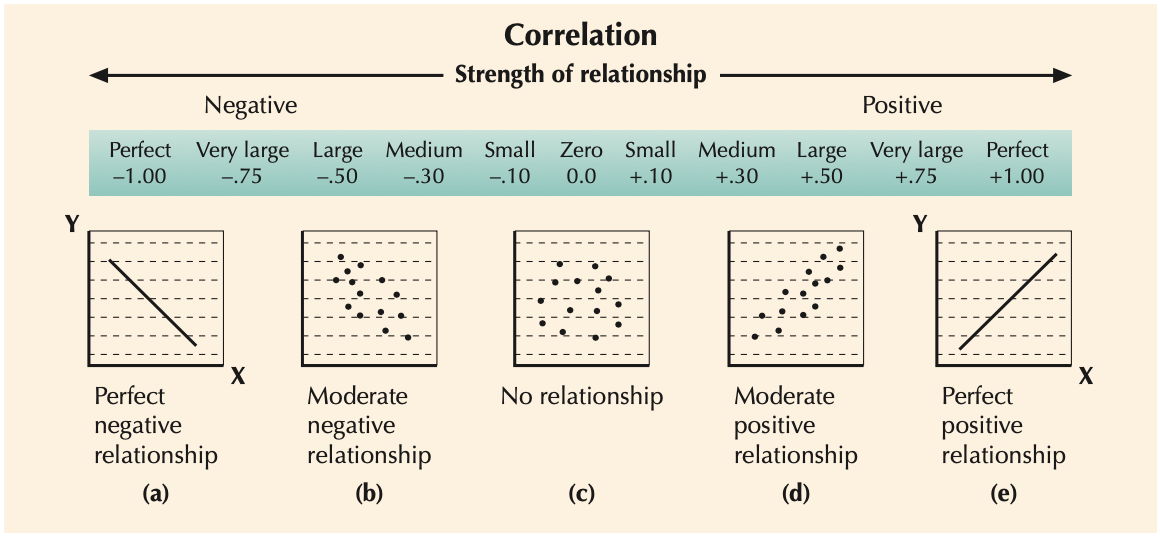

In [25]:
correlation = df.corr(numeric_only=True)

fig = px.imshow(
    correlation,
    template = "plotly_dark",
    text_auto = "0.2f",
    aspect=1,
    color_continuous_scale="orrd",
    title= "Correlations Between Data"
)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

In [26]:
fig = px.scatter_matrix(
    df,
    dimensions=df.select_dtypes(include="number").columns,
    height=800,
    color="Salary",
    opacity=0.65,
    title= "Relationships Between Numerical Data",
    template="plotly_dark"
    
)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

<h3 style = "font: bold 18px arial;
             color: gold;
             background-color: #111;
             padding: 15px;
             border: 2px solid orangere">
    ► From Thses Graphs & Explorations We Can Find Out That:
    <br>
    <br>
    • There is a <b style = "color: tomato">Strong</b> Linear Positive Correlation between Salary and Age
    <br>
    <br>
    • There is a <b style = "color: tomato">Strong</b> Linear Positive Correlation between Salary and Experience Year
</h3>

# I think it's time now to build our model!!🤩👨‍💻

<p style = "color: #F3CCFF;
            font: bold 22px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid violet;
            border-radius: 8px">
    1] Encoding Categorical Data: (Converting Categorical Into Numerical)
</p>

In [58]:
df_encoded = pd.get_dummies(df, columns=["Education Level"], drop_first=True) *1
df_encoded.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Director,20.0,200000.0,1,0


<p style = "color: #F3CCFF;
            font: bold 22px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid violet;
            border-radius: 8px">
    2] Selecting Our Features
</p>

In [59]:
X = df_encoded.drop(columns=["Job Title", "Salary", "Gender"])
y = df_encoded["Salary"]

In [60]:
X.head(2)

,Age,Years of Experience,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,0
1,28.0,3.0,1,0


<p style = "color: #F3CCFF;
            font: bold 22px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid violet;
            border-radius: 8px">
    3] Splitting Our Data
</p>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

<p style = "color: #F3CCFF;
            font: bold 22px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid violet;
            border-radius: 8px">
    4] Cross Validation Score
</p>

In [70]:
kf = KFold(n_splits=10, shuffle=True, random_state=30)

In [75]:
rf = RandomForestRegressor(n_estimators=500, random_state=18)

In [76]:
scores = cross_val_score(rf, X, y, cv=kf)
print(f"Model Score: {np.mean(scores)*100:0.2f}%")

Model Score: 85.76%


<p style = "color: #F3CCFF;
            font: bold 22px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid violet;
            border-radius: 8px">
    4] Fitting The Model
</p>

In [77]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=18)

In [78]:
score = rf.score(X_train, y_train)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 94.25%


<p style = "color: #F3CCFF;
            font: bold 22px arial;
            padding: 15px;
            background-color: #111;
            border: 3px solid violet;
            border-radius: 8px">
    4] Finally, Let's Predict🤗🤩
</p>

In [79]:
predicted_salary = np.round(rf.predict(X_test))

In [80]:
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predected_df = pd.DataFrame(d)
predected_df.head()

,Actual_Salary,Predicted_Salary,error
224,160000.0,152639.0,-7361.0
279,140000.0,129876.0,-10124.0
130,160000.0,178554.0,18554.0
186,100000.0,93300.0,-6700.0
149,175000.0,170066.0,-4934.0


In [81]:
score = r2_score(y_test, predicted_salary)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 93.73%


In [82]:
np.sqrt(mean_squared_error(y_test, predicted_salary))

12695.218619016192

In [83]:
fig = px.scatter(
    predected_df, 
    x = "Actual_Salary", 
    y = "Predicted_Salary",
    color = "error",
    opacity=0.8,
    title= "Predicted Vs. Actual",
    template="plotly_dark",
    trendline="ols"
    
)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

In [56]:
# pd.to_pickle(rf, "random_forest_regressor_salary_predictor_v1.pkl")